In [141]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 180

In [2]:
df1 = pd.read_csv("D:\Diplomados y Cursos\Diplomado python y machine learning\Modulo 2\Evaluacion\ejemplo_data.csv")
df1

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,"$125,000.00",$162500.00,30.00%,500,1-10-2015,1
1,552278,Manantial sa,"$920,000.00","$101,2000.00",10.00%,700,6-23-2014,0
2,23477,ACME,"$50,000.00",62500.00,25.00%,125,3-12-2016,1
3,24900,Andes sur,"$350,000.00",490000.00,4.00%,75,10-28-2015,1
4,651029,San Pablo,"$15,000.00",$12750.00,-15.00%,No,2-15-2014,0
5,651029,San Pablo,"-$15,000.00",$ 12750.00,-15.00%,No,2-15-2014,n


In [3]:
df1.dtypes

ID              int64
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo         object
dtype: object

In [4]:
df1['Activo'] = df1['Activo'].replace('n', '0')


In [5]:
df1["ID"] = df1["ID"].astype("int")
df1["Activo"] = df1["Activo"].astype("int")
df1.dtypes

ID              int32
Nombre         object
2016           object
2017           object
Crecimiento    object
Unidades       object
fecha          object
Activo          int32
dtype: object

In [6]:
def convertir_monto(val):
    nuevo_dato = val.replace(",","").replace("$","")
    return float(nuevo_dato)


In [7]:
df1["2016"] = df1["2016"].apply(convertir_monto)


In [8]:
df1.dtypes

ID               int32
Nombre          object
2016           float64
2017            object
Crecimiento     object
Unidades        object
fecha           object
Activo           int32
dtype: object

In [9]:
df1["Activo"] = df1["Activo"].astype("bool")

In [10]:
df1

,ID,Nombre,2016,2017,Crecimiento,Unidades,fecha,Activo
0,10002,Verde Mar,125000.0,$162500.00,30.00%,500,1-10-2015,True
1,552278,Manantial sa,920000.0,"$101,2000.00",10.00%,700,6-23-2014,False
2,23477,ACME,50000.0,62500.00,25.00%,125,3-12-2016,True
3,24900,Andes sur,350000.0,490000.00,4.00%,75,10-28-2015,True
4,651029,San Pablo,15000.0,$12750.00,-15.00%,No,2-15-2014,False
5,651029,San Pablo,-15000.0,$ 12750.00,-15.00%,No,2-15-2014,False


In [11]:
df1.dtypes

ID               int32
Nombre          object
2016           float64
2017            object
Crecimiento     object
Unidades        object
fecha           object
Activo            bool
dtype: object

In [12]:
dicc = {'Nombre': pd.Series(['Cristian', 'Angelo', 'Herman', 'Gabriela', 'Andres', 'Alvaro', 
                             'Cristobal','David', 'Daniel', 'Carla','Carlos','Jordan','Luis','Elvis',
                             'Maria', 'Juan', 'Ricardo', 'Pablo', 'Hugo', 'Elena']),
       'Edad': pd.Series([31, 30, 21, 18, 25, 43, 23, 21, 55, 34, 22, 32, 33,
                         21, 46 , 36, 24, 31, 27, 29]),
       'Nota': pd.Series([4.1, 3.4, 6.1,4.3, 5.1, 2.3, 3.4, 4.5, 5.8, 6.4, 5.8,
                         3.2, 1.0, 5.5, 6.3, 4.5, 4.7, 6.6, 7.0, 6.3])}
df2 = pd.DataFrame(dicc)

In [13]:
df2

,Nombre,Edad,Nota
0,Cristian,31,4.1
1,Angelo,30,3.4
2,Herman,21,6.1
3,Gabriela,18,4.3
4,Andres,25,5.1
5,Alvaro,43,2.3
6,Cristobal,23,3.4
7,David,21,4.5
8,Daniel,55,5.8
9,Carla,34,6.4


# Medidas de tendencia central

In [14]:
df3 = df2.copy()
df3

,Nombre,Edad,Nota
0,Cristian,31,4.1
1,Angelo,30,3.4
2,Herman,21,6.1
3,Gabriela,18,4.3
4,Andres,25,5.1
5,Alvaro,43,2.3
6,Cristobal,23,3.4
7,David,21,4.5
8,Daniel,55,5.8
9,Carla,34,6.4


In [15]:
print('Edad promedio: ', df2['Edad'].mean()) #promedio edad
print('Nota promedio: ', np.round(df2['Nota'].mean(),2)) #promedio notas


Edad promedio:  30.1
Nota promedio:  4.81


In [16]:
df2.Edad.mode()#moda edad, valor que más se repite


0    21
Name: Edad, dtype: int64

In [17]:
df2.Nota.mode() #moda nota, valor que más se repite

0    3.4
1    4.5
2    5.8
3    6.3
Name: Nota, dtype: float64

In [18]:
df2.Edad.median() #mediana edad, valor medio

29.5

In [19]:
df2.Nota.median() #mediana nota, valor medio

4.9

In [20]:
df3['pesos'] = pd.Series([1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,1/20,5/20,5/20
                         ,1/20,1/20,1/20,1/20,1/20,1/20,1/20,5/20])
pond_formula = (df3['Edad']*df3['pesos']).sum()/df3['pesos'].sum()
promedio_ponderado = np.average(df3['Edad'], weights=df3['pesos'])
print('Promedio ponderado: ', np.round(promedio_ponderado,2))

Promedio ponderado:  29.19


In [21]:
print(df3.shape)
df3 = df3.drop(df3.index[[18,19]])
print(df3.shape)
df3

(20, 4)
(18, 4)


,Nombre,Edad,Nota,pesos
0,Cristian,31,4.1,0.05
1,Angelo,30,3.4,0.05
2,Herman,21,6.1,0.05
3,Gabriela,18,4.3,0.05
4,Andres,25,5.1,0.05
5,Alvaro,43,2.3,0.05
6,Cristobal,23,3.4,0.05
7,David,21,4.5,0.05
8,Daniel,55,5.8,0.05
9,Carla,34,6.4,0.05


In [22]:
print('Edad promedio: ', np.round(df3['Edad'].mean(),2)) #promedio edad
print('Nota promedio: ', np.round(df3['Nota'].mean(),2)) #promedio notas

Edad promedio:  30.33
Nota promedio:  4.61


# Medidas de dispersión

In [23]:
print('Rango Edad: ', np.round(df2.Edad.max()-df2.Edad.min(),2))
print('Rango Nota: ', np.round(df2.Nota.max()-df2.Nota.min(),2))

Rango Edad:  37
Rango Nota:  6.0


In [24]:
print('Varianza Edad: ', np.round(df2.Edad.var(),2))
print('Varianza Nota: ', np.round(df2.Nota.var(),2))

Varianza Edad:  88.83
Varianza Nota:  2.5


In [25]:
print('Desviación Estándar Edad: ', np.round(df2.Edad.std(),2))
print('Desviación Estándar Nota: ', np.round(df2.Nota.std(),2))

Desviación Estándar Edad:  9.43
Desviación Estándar Nota:  1.58


In [26]:
df2[['Edad', 'Nota']].quantile([0.25,0.5,0.75])

,Edad,Nota
0.25,22.75,3.925
0.50,29.50,4.900
0.75,33.25,6.150


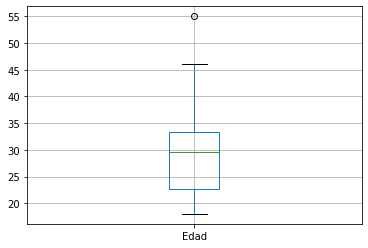

In [27]:
import matplotlib.pyplot as plt
plot = df2[['Edad', 'Nombre']]
plot.boxplot()
plt.show()

In [28]:
df2.cov()

,Edad,Nota
Edad,88.831579,-0.470000
Nota,-0.470000,2.500289


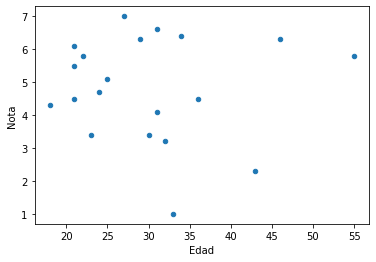

In [29]:
df2.plot.scatter(x='Edad', y='Nota')
plt.show()

# Transformación e imputación de variables

In [202]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer


In [203]:
df6 = pd.read_csv("D:\Diplomados y Cursos\Diplomado python y machine learning\Modulo 2\Evaluacion\ejemplo_data2.csv")
df6

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [205]:
df6.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [206]:
df6.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [207]:
for i in df6.columns:
    print (i+': '+str(df6[i].isnull().sum()))

Suburb: 0
Address: 0
Rooms: 0
Type: 0
Price: 0
Method: 0
SellerG: 0
Date: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 62
Landsize: 0
BuildingArea: 6450
YearBuilt: 5375
CouncilArea: 1369
Lattitude: 0
Longtitude: 0
Regionname: 0
Propertycount: 0


In [208]:
for i in df6.columns:
    if(df6[i].dtype == np.float64 or df6[i].dtype == np.int64):
          print(i+': '+str(df6[i].isnull().sum()))
    else:
         print("No es variable numérica")

No es variable numérica
No es variable numérica
Rooms: 0
No es variable numérica
Price: 0
No es variable numérica
No es variable numérica
No es variable numérica
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 62
Landsize: 0
BuildingArea: 6450
YearBuilt: 5375
No es variable numérica
Lattitude: 0
Longtitude: 0
No es variable numérica
Propertycount: 0


In [209]:
df6['BuildingArea']=df6['BuildingArea'].fillna(value=df6['BuildingArea'].mean())
df6['BuildingArea'].isnull().sum()

0

In [210]:
df6['YearBuilt']=df6['YearBuilt'].fillna(value=df6['YearBuilt'].mean())
df6['YearBuilt'].isnull().sum()

0

In [211]:
df6['CouncilArea']= df6['CouncilArea'].fillna(method='ffill').fillna(method='bfill')
df6['CouncilArea'].isnull().sum()

0

In [212]:
df6['Car']= df6['Car'].fillna(method='ffill').fillna(method='bfill')

In [213]:
df6['Car'].isnull().sum()

0

In [214]:
codificador = OneHotEncoder()
codificacion = codificador.fit_transform(df6[['Rooms']])
cols_rooms = pd.DataFrame(codificacion.toarray(), columns = codificador.categories_)
print(cols_rooms)

        1    2    3    4    5    6    7    8    10
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
3      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...
13575  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
13576  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
13577  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
13578  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
13579  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0

[13580 rows x 9 columns]


In [215]:
df6 = df6.drop(["Rooms"], axis = 1)

In [216]:
df6 = pd.concat([df6, cols_rooms], axis = "columns")


In [217]:
df6

,Suburb,Address,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Propertycount,"(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(7,)","(8,)","(10,)"
0,Abbotsford,85 Turner St,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,4019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,4019.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abbotsford,5 Charles St,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abbotsford,40 Federation La,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,4019.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abbotsford,55a Park St,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,4019.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,...,7392.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13576,Williamstown,77 Merrett Dr,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,...,6380.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13577,Williamstown,83 Power St,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,...,6380.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13578,Williamstown,96 Verdon St,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,...,6380.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [218]:
codificador1 = OneHotEncoder()
codificacion1 = codificador1.fit_transform(df6[['Type']])
cols_type = pd.DataFrame(codificacion1.toarray(), columns = codificador1.categories_)
print(cols_type)
df6 = df6.drop(["Type"], axis = 1)
df6 = pd.concat([df6, cols_type], axis = "columns")

         h    t    u
0      1.0  0.0  0.0
1      1.0  0.0  0.0
2      1.0  0.0  0.0
3      1.0  0.0  0.0
4      1.0  0.0  0.0
...    ...  ...  ...
13575  1.0  0.0  0.0
13576  1.0  0.0  0.0
13577  1.0  0.0  0.0
13578  1.0  0.0  0.0
13579  1.0  0.0  0.0

[13580 rows x 3 columns]


In [219]:
df6

,Suburb,Address,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,...,"(3,)","(4,)","(5,)","(6,)","(7,)","(8,)","(10,)","(h,)","(t,)","(u,)"
0,Abbotsford,85 Turner St,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Abbotsford,25 Bloomburg St,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Abbotsford,5 Charles St,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Abbotsford,40 Federation La,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Abbotsford,55a Park St,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13576,Williamstown,77 Merrett Dr,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13577,Williamstown,83 Power St,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13578,Williamstown,96 Verdon St,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [220]:
codificador2 = OneHotEncoder()
codificacion2 = codificador2.fit_transform(df6[['Method']])
cols_method = pd.DataFrame(codificacion2.toarray(), columns = codificador2.categories_)
print(cols_method)
df6 = df6.drop(["Method"], axis = 1)
df6 = pd.concat([df6, cols_method], axis = "columns")

        PI    S   SA   SP   VB
0      0.0  1.0  0.0  0.0  0.0
1      0.0  1.0  0.0  0.0  0.0
2      0.0  0.0  0.0  1.0  0.0
3      1.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  1.0
...    ...  ...  ...  ...  ...
13575  0.0  1.0  0.0  0.0  0.0
13576  0.0  0.0  0.0  1.0  0.0
13577  0.0  1.0  0.0  0.0  0.0
13578  1.0  0.0  0.0  0.0  0.0
13579  0.0  0.0  0.0  1.0  0.0

[13580 rows x 5 columns]


In [221]:
codificador3 = OneHotEncoder()
codificacion3 = codificador3.fit_transform(df6[['SellerG']])
cols_seller = pd.DataFrame(codificacion3.toarray(), columns = codificador3.categories_)
print(cols_seller)
df6 = df6.drop(["SellerG"], axis = 1)
df6 = pd.concat([df6, cols_seller], axis = "columns")

      @Realty  ASL Abercromby's  Ace Alexkarbon Allens Anderson Appleby  \
0         0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
1         0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
2         0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
3         0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
4         0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
...       ...  ...          ...  ...        ...    ...      ...     ...   
13575     0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
13576     0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
13577     0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
13578     0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   
13579     0.0  0.0          0.0  0.0        0.0    0.0      0.0     0.0   

      Aquire Area  ... Zahn buyMyplace hockingstuart hockingstuart/Advantage  \
0        0.0  0.0  

In [130]:
codificador4 = OneHotEncoder()
codificacion4 = codificador4.fit_transform(df6[['Regionname']])
cols_region = pd.DataFrame(codificacion4.toarray(), columns = codificador4.categories_)
print(cols_region)
df6 = df6.drop(["Regionname"], axis = 1)
df6 = pd.concat([df6, cols_region], axis = "columns")

      Eastern Metropolitan Eastern Victoria Northern Metropolitan  \
0                      0.0              0.0                   1.0   
1                      0.0              0.0                   1.0   
2                      0.0              0.0                   1.0   
3                      0.0              0.0                   1.0   
4                      0.0              0.0                   1.0   
...                    ...              ...                   ...   
13575                  0.0              0.0                   0.0   
13576                  0.0              0.0                   0.0   
13577                  0.0              0.0                   0.0   
13578                  0.0              0.0                   0.0   
13579                  0.0              0.0                   0.0   

      Northern Victoria South-Eastern Metropolitan Southern Metropolitan  \
0                   0.0                        0.0                   0.0   
1                  

In [222]:
codificador5 = OneHotEncoder()
codificacion5 = codificador5.fit_transform(df6[['Suburb']])
cols_suburb = pd.DataFrame(codificacion5.toarray(), columns = codificador5.categories_)
print(cols_suburb)
df6 = df6.drop(["Suburb"], axis = 1)
df6 = pd.concat([df6, cols_suburb], axis = "columns")

      Abbotsford Aberfeldie Airport West Albanvale Albert Park Albion  \
0            1.0        0.0          0.0       0.0         0.0    0.0   
1            1.0        0.0          0.0       0.0         0.0    0.0   
2            1.0        0.0          0.0       0.0         0.0    0.0   
3            1.0        0.0          0.0       0.0         0.0    0.0   
4            1.0        0.0          0.0       0.0         0.0    0.0   
...          ...        ...          ...       ...         ...    ...   
13575        0.0        0.0          0.0       0.0         0.0    0.0   
13576        0.0        0.0          0.0       0.0         0.0    0.0   
13577        0.0        0.0          0.0       0.0         0.0    0.0   
13578        0.0        0.0          0.0       0.0         0.0    0.0   
13579        0.0        0.0          0.0       0.0         0.0    0.0   

      Alphington Altona Altona Meadows Altona North  ... Williams Landing  \
0            0.0    0.0            0.0        

In [223]:
codificador6 = OneHotEncoder()
codificacion6 = codificador6.fit_transform(df6[['Address']])
cols_address = pd.DataFrame(codificacion6.toarray(), columns = codificador6.categories_)
print(cols_address)
df6 = df6.drop(["Address"], axis = 1)
df6 = pd.concat([df6, cols_address], axis = "columns")

      1 Adelle Ct 1 Airlie St 1 Albion Ct 1 Alexander St 1 Alma St 1 Ann St  \
0             0.0         0.0         0.0            0.0       0.0      0.0   
1             0.0         0.0         0.0            0.0       0.0      0.0   
2             0.0         0.0         0.0            0.0       0.0      0.0   
3             0.0         0.0         0.0            0.0       0.0      0.0   
4             0.0         0.0         0.0            0.0       0.0      0.0   
...           ...         ...         ...            ...       ...      ...   
13575         0.0         0.0         0.0            0.0       0.0      0.0   
13576         0.0         0.0         0.0            0.0       0.0      0.0   
13577         0.0         0.0         0.0            0.0       0.0      0.0   
13578         0.0         0.0         0.0            0.0       0.0      0.0   
13579         0.0         0.0         0.0            0.0       0.0      0.0   

      1 Arnot St 1 Arthur St 1 Ash Gr 1 Ashdown Ct 

In [224]:
data1 = multivariate_normal(mean=[12,12],cov=3).rvs(3000)
data1 = np.hstack([data1,np.zeros((data1.shape[0],1))])
data1 = pd.DataFrame(data1, columns=['x','y','c'])

data2 = multivariate_normal(mean=[7,7],cov=1).rvs(1900)
data2 = np.hstack([data2,np.ones((data2.shape[0],1))])
data2 = pd.DataFrame(data2, columns=['x','y','c'])

data = np.concatenate([data1,data2],axis=0)
data = pd.DataFrame(data, columns=['x','y','c'])

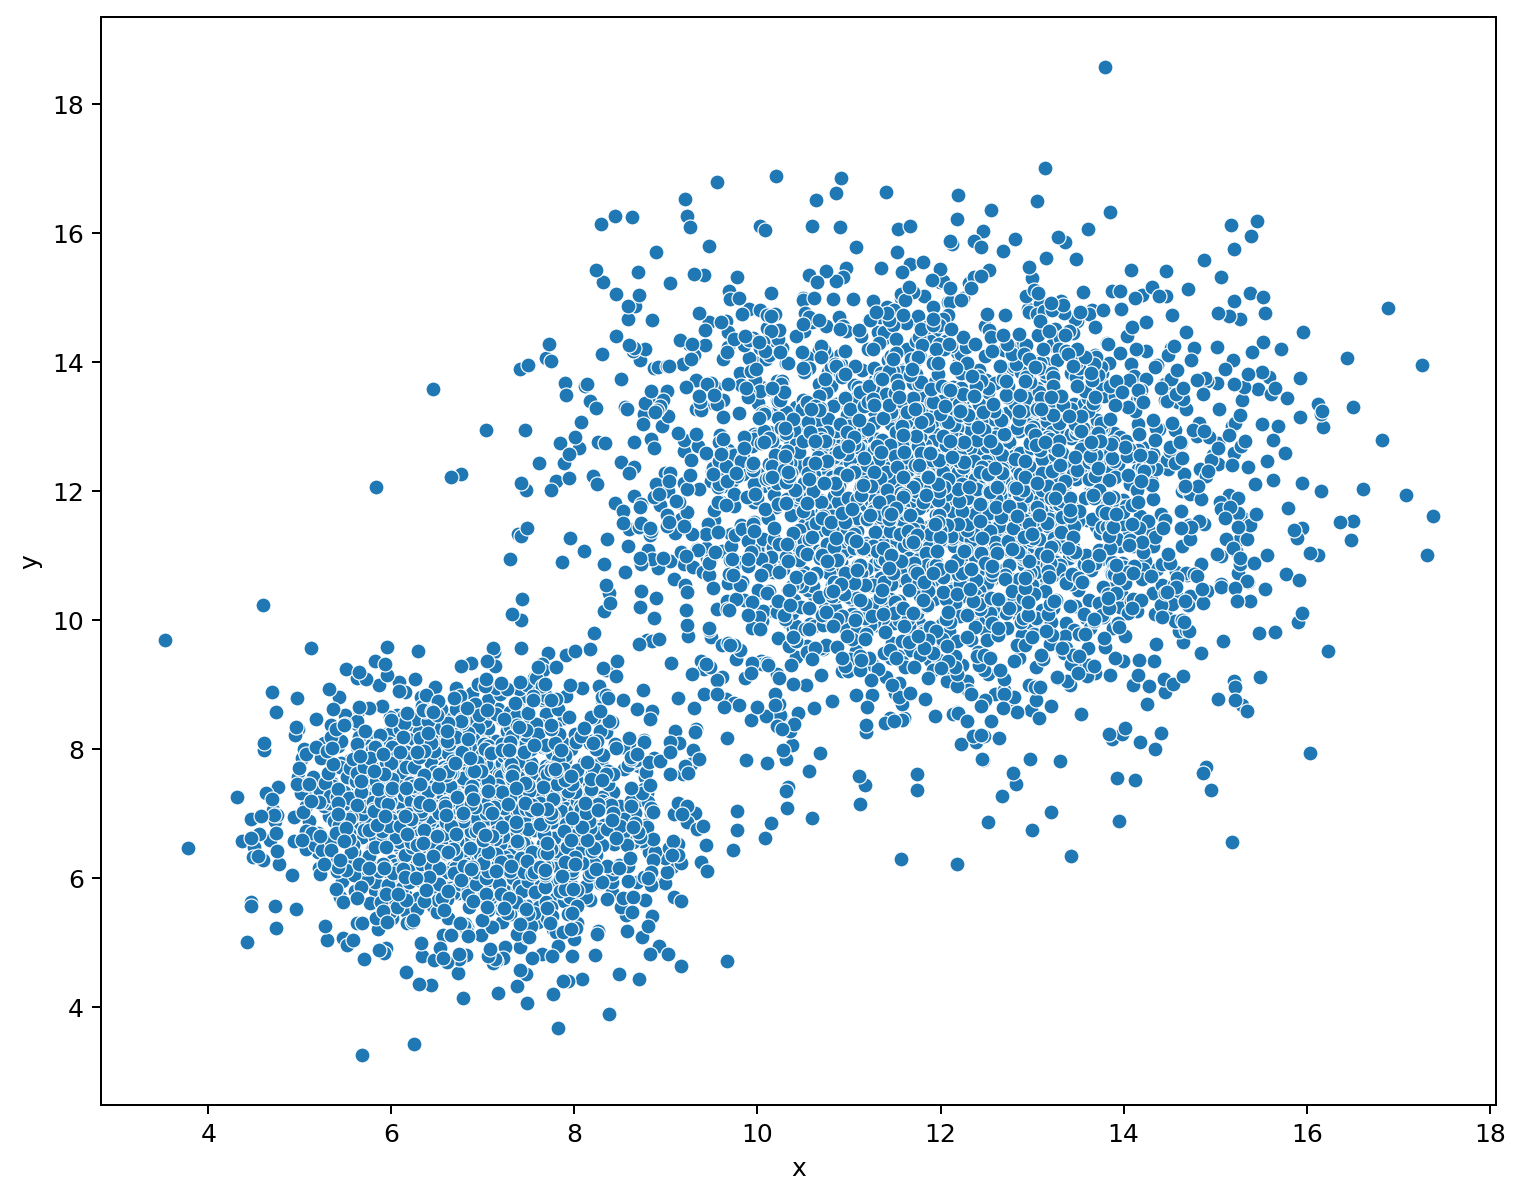

In [225]:
fig = plt.figure(figsize=(10,8));
sns.scatterplot(x='x',y='y', data=data);

D:\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


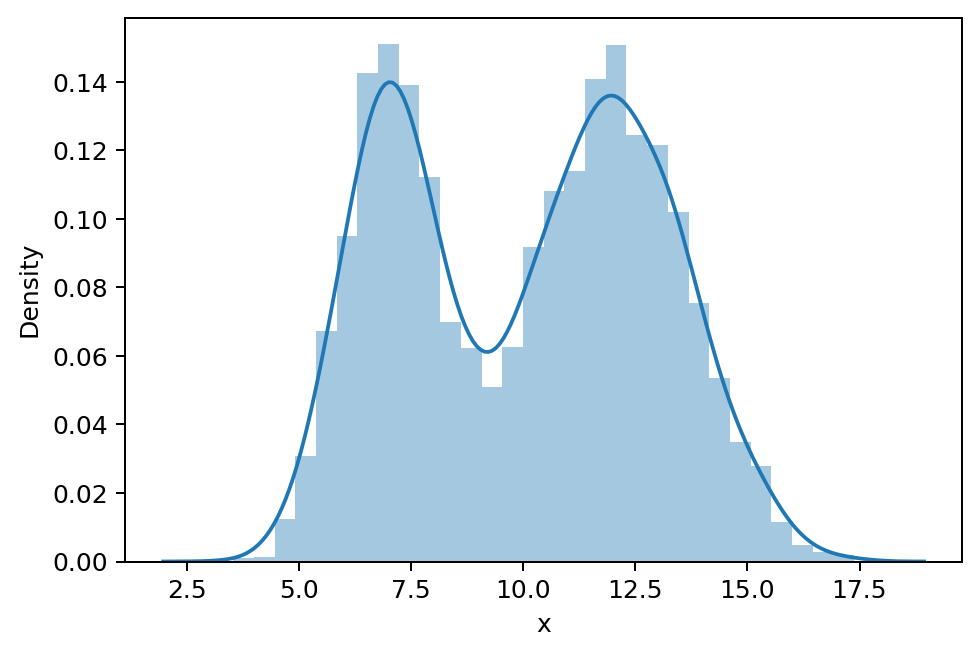

In [226]:
sns.distplot(data['x'], bins=30, kde=True, rug=False);

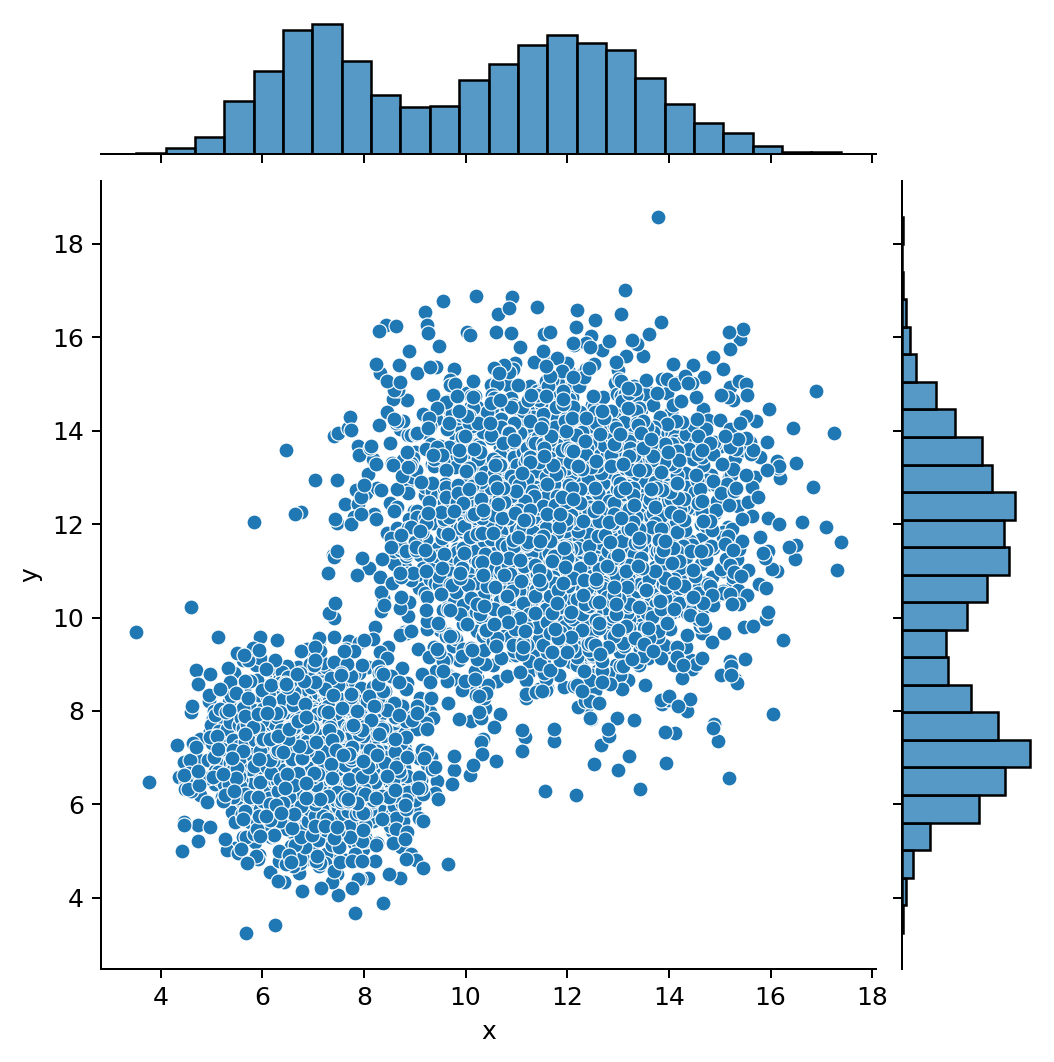

In [227]:
sns.jointplot(x='x',y='y', data=data);

<AxesSubplot:xlabel='x', ylabel='y'>

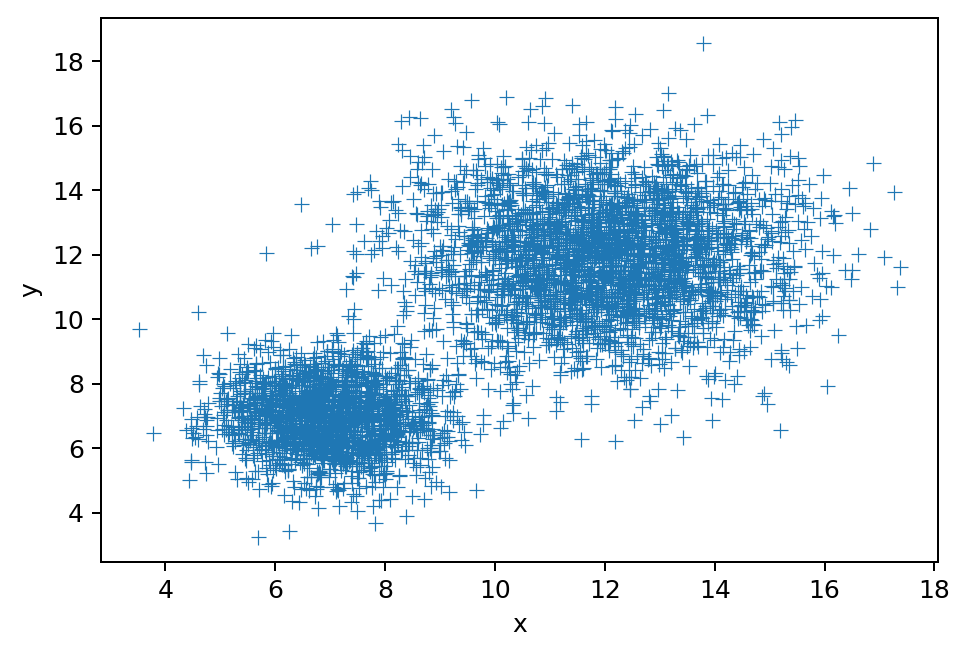

In [228]:
sns.scatterplot(data = data, x= 'x', y = 'y', marker = "+")

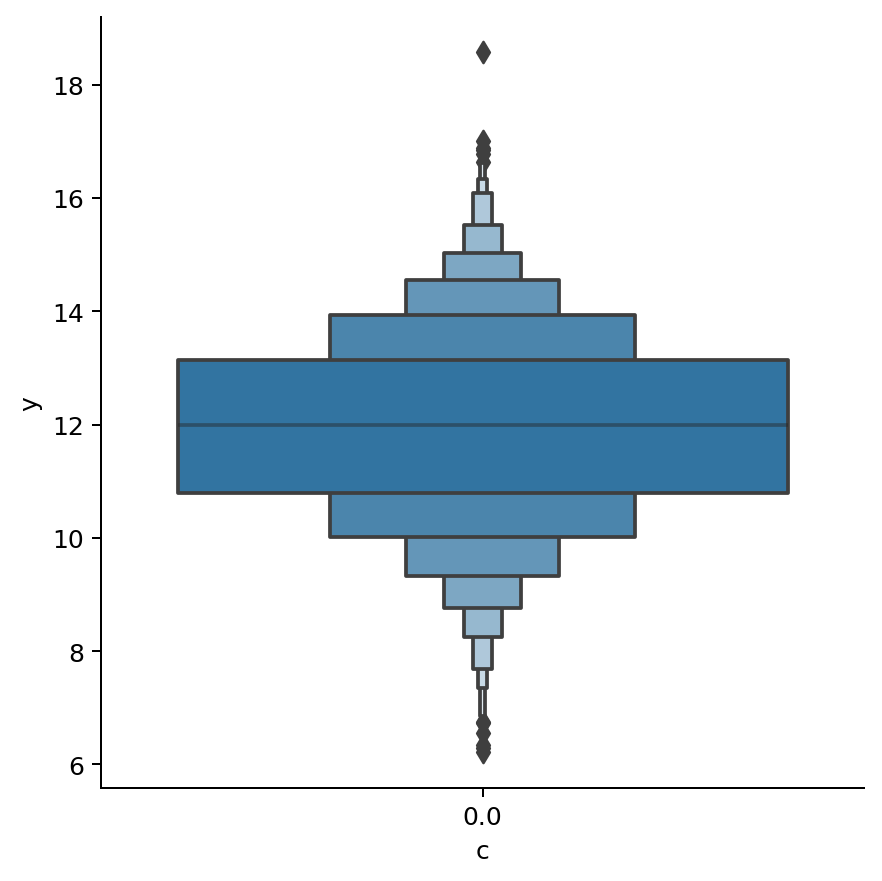

In [229]:
sns.catplot(x="c", y="y", kind="boxen", data=data1);

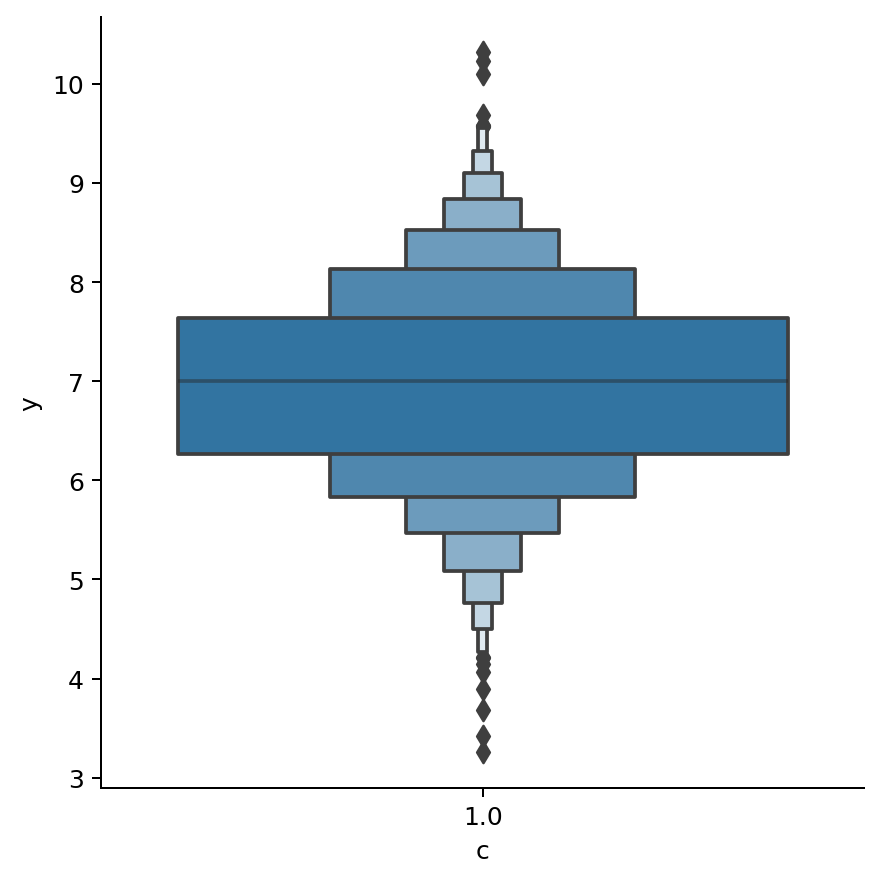

In [230]:
sns.catplot(x="c", y="y", kind="boxen", data=data2);

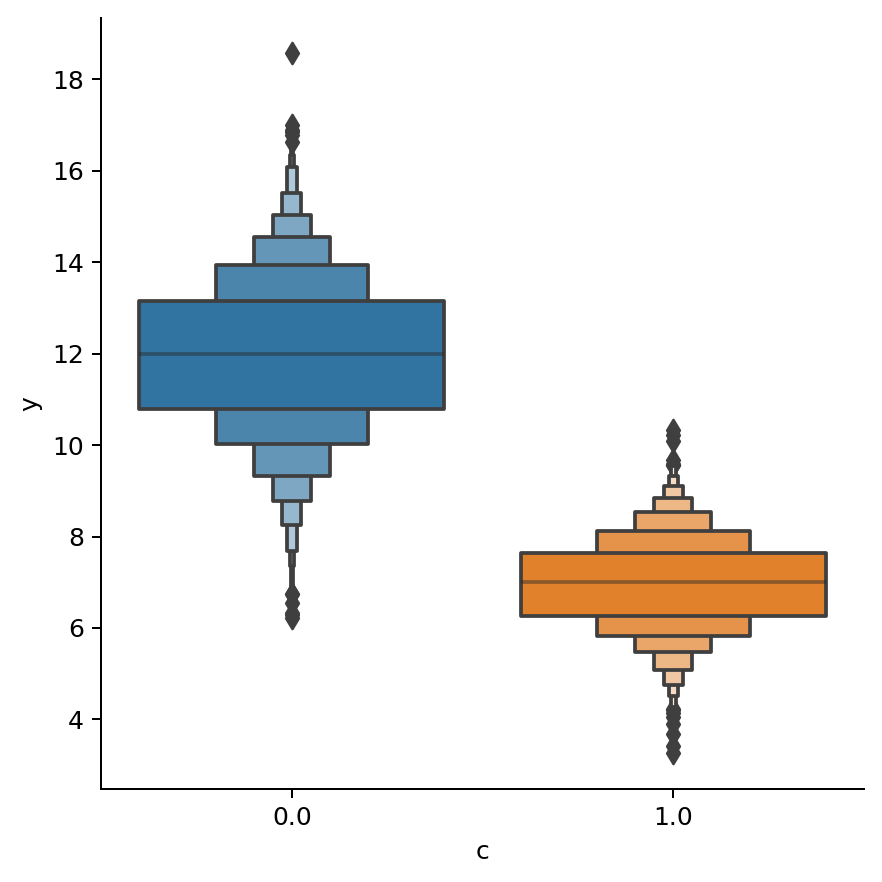

In [231]:
sns.catplot(x="c", y="y", kind="boxen", data=data);